In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score


In [ ]:
df=pd.read_csv("/content/IRIS.csv")
print(df.shape)
print(df.head)

(150, 5)
<bound method NDFrame.head of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>


In [ ]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


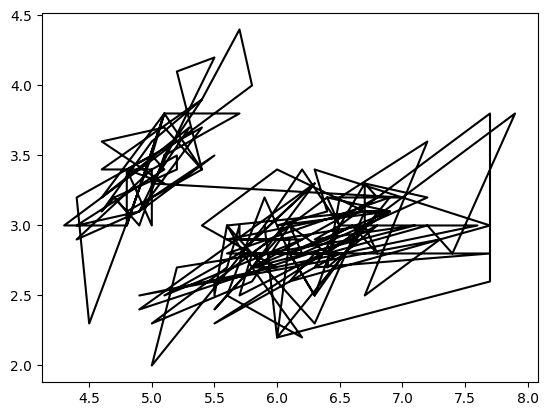

In [ ]:
p = df["sepal_length"]
q = df["sepal_width"]
plt.plot(p, q, color = "black")
plt.show()

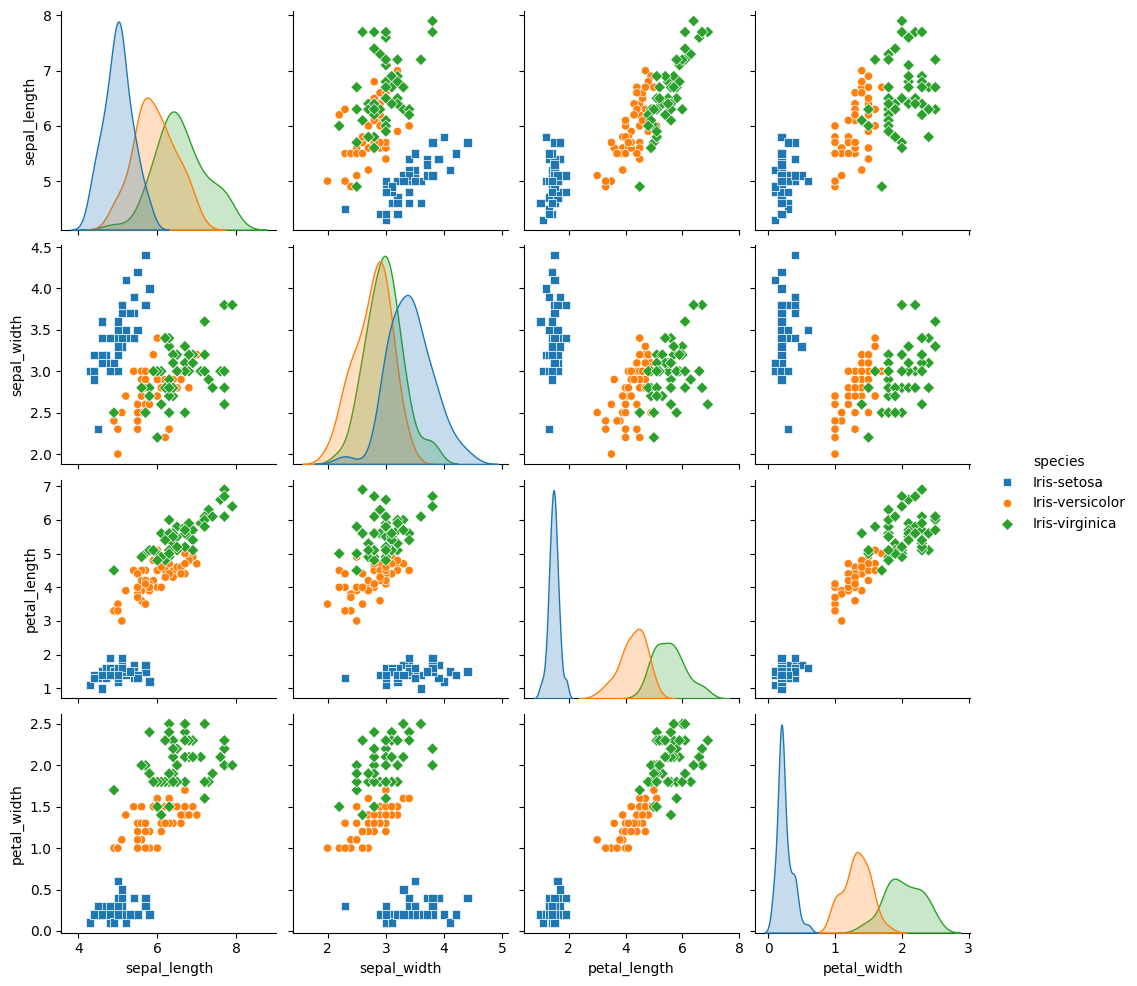

In [ ]:
sns.pairplot(df, hue='species', markers=['s', 'o', 'D'])
plt.show()

In [ ]:
from sklearn.datasets import load_iris

iris =load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)

[[-1.47393679  1.20365799 -1.56253475 -1.31260282]
 [-0.13307079  2.99237573 -1.27600637 -1.04563275]
 [ 1.08589829  0.08570939  0.38585821  0.28921757]
 [-1.23014297  0.75647855 -1.2187007  -1.31260282]
 [-1.7177306   0.30929911 -1.39061772 -1.31260282]
 [ 0.59831066 -1.25582892  0.72969227  0.95664273]
 [ 0.72020757  0.30929911  0.44316389  0.4227026 ]
 [-0.74255534  0.98006827 -1.27600637 -1.31260282]
 [-0.98634915  1.20365799 -1.33331205 -1.31260282]
 [-0.74255534  2.32160658 -1.27600637 -1.44608785]
 [-0.01117388 -0.80864948  0.78699794  0.95664273]
 [ 0.23261993  0.75647855  0.44316389  0.55618763]
 [ 1.08589829  0.08570939  0.55777524  0.4227026 ]
 [-0.49876152  1.87442714 -1.39061772 -1.04563275]
 [-0.49876152  1.4272477  -1.27600637 -1.31260282]
 [-0.37686461 -1.47941864 -0.01528151 -0.24472256]
 [ 0.59831066 -0.58505976  0.78699794  0.4227026 ]
 [ 0.72020757  0.08570939  1.01622064  0.8231577 ]
 [ 0.96400139 -0.13788033  0.38585821  0.28921757]
 [ 1.69538284  1.20365799  1.36

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix\n\n", cm)
print("\n Ture positives(TP) = ", cm[0,0])
print("\n Ture Negatives(TN) = ", cm[1,1])
print("\n False positives(FP) = ", cm[0,1])
print("\n False Negatives(FN) = ", cm[1,0])

Confusion matrix

 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

 Ture positives(TP) =  10

 Ture Negatives(TN) =  9

 False positives(FP) =  0

 False Negatives(FN) =  0


In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_results = cross_val_score(model, X_train, y_train, cv=kfold)
mean_accuracy = np.mean(cross_val_results)
print("Cross-Validation Results:", cross_val_results)
print("Mean Accuracy:", mean_accuracy)

Cross-Validation Results: [0.91666667 0.95833333 0.91666667 0.83333333 1.        ]
Mean Accuracy: 0.925


In [ ]:
iris = load_iris()
X, y = iris.data, iris.target
model = RandomForestClassifier()
model.fit(X, y)
new_data = [[5.9, 3, 5.7, 1.8]]
predictions = model.predict(new_data_scaled)
print("Predicted Class:", predictions)


Predicted Class: [1]
